In [1]:
import sys
sys.path.append('../Segmentation_UNet')

from model import UNet
from src.data_module import DataModule

import pandas as pd
import numpy as np
import torch
import pytorch_lightning as pl
from pytorch_lightning.loggers import CSVLogger
import torchvision.transforms as T
from PIL import Image
import cv2
from pycocotools.coco import COCO
import os
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

c:\Users\DannW\Anaconda3\envs\segmentation_coco_env\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
stage = 'Train'
t_epochs = 350
t_batch_size = 6
t_num_classes = 2
t_new_shape = (512, 512) 
dataset_csv_path = os.path.join('data', 'dataset_firstTest', 'train_100dogs_100cats_100nocatsnodogs', 'train_for_OutSegmentationModelTest.csv') 
dataset_folder = os.path.join('data', 'dataset_firstTest', 'train_100dogs_100cats_100nocatsnodogs') 
model_name = 'model01_unet_300_epochs_'+str(t_epochs)
csv_logger = CSVLogger(
    save_dir='H:\Documentos\Code\ML_BasicNets_Tutorials\Segmentation_UNet\model\model_logs',
    name='metriclogs_'+model_name
)

In [3]:
from pytorch_lightning.callbacks import ModelCheckpoint
val_loss_checkpoint_callback = ModelCheckpoint(
        monitor='val_loss',
        dirpath='H:\Documentos\Code\ML_BasicNets_Tutorials\Segmentation_UNet\model\model_logs\metriclogs_'+model_name+'/',
        filename=model_name+'-{epoch}-{val_loss:.2f}'+'_checkpoint'
    )

In [4]:
dm = DataModule(t_batch_size, t_num_classes, t_new_shape, dataset_csv_path, dataset_folder)
if stage == 'Train':
    trainer_resnet = pl.Trainer(max_epochs=t_epochs
                                    , accelerator='gpu'
                                    , devices = 1
                                    , log_every_n_steps=14
                                    , logger=[csv_logger]
                                    , callbacks=[val_loss_checkpoint_callback]
                                    )
    model = UNet()
    trainer_resnet.fit(model, dm)
    torch.save(model.state_dict(), 'model/model_logs/metriclogs_'+model_name+'/'+model_name+'.pt') # Atencion!

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type       | Params
---------------------------------------
0 | conv1   | Sequential | 2.8 K 
1 | conv2   | Sequential | 14.0 K
2 | conv3   | Sequential | 55.7 K
3 | conv4   | Sequential | 221 K 
4 | deconv1 | deconv     | 143 K 
5 | deconv2 | deconv     | 36.1 K
6 | deconv3 | deconv     | 9.1 K 
7 | out     | Conv2d     | 290   
---------------------------------------
483 K     Trainable params
0         Non-trainable params
483 K     Total params
1.935     Total estimated model params size (MB)


shape:  80 20
Sanity Checking DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]

c:\Users\DannW\Anaconda3\envs\segmentation_coco_env\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


c:\Users\DannW\Anaconda3\envs\segmentation_coco_env\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Epoch 349: 100%|██████████| 18/18 [00:27<00:00,  1.55s/it, loss=0.0352, v_num=0, iou=0.943, val_loss=0.419, val_iou=0.877]

`Trainer.fit` stopped: `max_epochs=350` reached.


Epoch 349: 100%|██████████| 18/18 [00:27<00:00,  1.56s/it, loss=0.0352, v_num=0, iou=0.943, val_loss=0.419, val_iou=0.877]


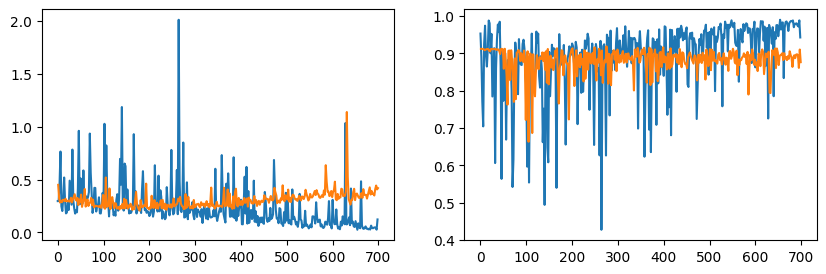

In [20]:
metrics_df = pd.read_csv('model/model_logs/metriclogs_model01_unet_300_epochs_350/version_0/metrics.csv')
fig, ax = plt.subplots(1,2, figsize=(10,3))
ax[0].plot(metrics_df['loss'].dropna(axis=0))
ax[0].plot(metrics_df['val_loss'].dropna(axis=0))
ax[1].plot(metrics_df['iou'].dropna(axis=0))
ax[1].plot(metrics_df['val_iou'].dropna(axis=0))
plt.show()

In [11]:
metrics_df['loss'].dropna(axis=0)

0      0.295842
2      0.296497
4      0.459974
6      0.764646
8      0.246299
         ...   
690    0.044708
692    0.047256
694    0.045069
696    0.025788
698    0.122335
Name: loss, Length: 350, dtype: float64